In [34]:
from sklearn import datasets, model_selection, neighbors, metrics, cluster 
import matplotlib.pyplot as plt 
from collections import Counter

# Data import and split 

In [35]:
data = datasets.load_digits()

In [36]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

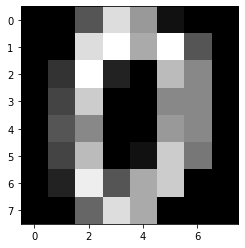

In [37]:
test = data.data[0].reshape(8,8)
plt.imshow(test, cmap = 'gray')

In [38]:
X = data.data
y = data.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3)
X_train.shape

(1257, 64)

# k-NN classifier

In [39]:
clf = neighbors.KNeighborsClassifier(algorithm = 'brute', n_neighbors = 5).fit(X_train, y_train)
y_pred = clf.predict(X_test)
dists, n_neighbors = clf.kneighbors(X_test)
print(metrics.classification_report(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      1.00      0.98        45
           2       1.00      1.00      1.00        55
           3       1.00      0.98      0.99        51
           4       1.00      0.97      0.98        59
           5       0.98      0.96      0.97        51
           6       0.98      1.00      0.99        60
           7       0.98      1.00      0.99        57
           8       0.94      0.96      0.95        52
           9       0.98      0.96      0.97        57

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

[[53  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0  0]
 [ 0  0 55  0  0  0  0  0  0  0]
 [ 0  0  0 50  0  0  0  1  0  0]
 [ 0  0  0  0 57  0  0  0  2  0]
 [ 0  0  0  0  0 49  1  0  0  1]
 [ 0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0

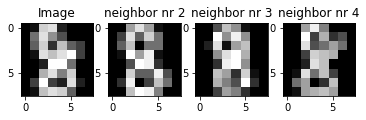

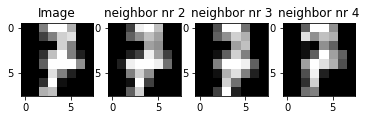

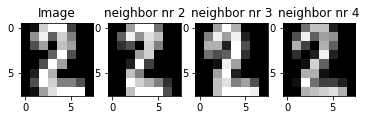

In [40]:
for i in range(1,4): 
    _, nearest = clf.kneighbors(X_test[i].reshape(1,-1))
    plt.subplot(1, 4, 1)
    plt.imshow(X_test[i].reshape(8,8), cmap = 'gray')
    plt.title('Image')
    
    for j in range(1,4):
        plt.subplot(1,4, j + 1)
        plt.imshow(X_train[nearest[0, j]].reshape(8,8), cmap = 'gray')
        plt.title('neighbor nr {}'.format(j+1))
    plt.show()
    

# k Means

ValueError: num must be 1 <= num <= 9, not 10

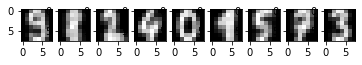

In [46]:
kmeans = cluster.KMeans(n_clusters = 10).fit(X_train)
centers = kmeans.cluster_centers_
for i, center in enumerate(centers):
    plt.subplot(1, 9, i+1)
    plt.imshow(center.reshape(8,8), cmap = 'gray')
plt.show()

In [42]:
y_pred = kmeans.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        53
           1       0.08      0.09      0.09        45
           2       0.07      0.05      0.06        55
           3       0.00      0.00      0.00        51
           4       0.04      0.05      0.05        59
           5       0.02      0.02      0.02        51
           6       0.00      0.00      0.00        60
           7       0.02      0.02      0.02        57
           8       0.21      0.35      0.26        52
           9       0.00      0.00      0.00        57

    accuracy                           0.15       540
   macro avg       0.14      0.16      0.15       540
weighted avg       0.14      0.15      0.14       540

[[53  0  0  0  0  0  0  0  0  0]
 [ 0  4  0 14  0  0  0 27  0  0]
 [ 1 45  3  0  1  0  0  4  1  0]
 [ 0  0 40  0  4  0  0  0  7  0]
 [ 0  0  0  1  3  0  0  1  0 54]
 [ 0  0  0  0  0  1 33  0 17  0]
 [ 1  0  0  0  0 59  0  0  0  0]
 [ 0  0  0

In [43]:
print(metrics.completeness_score(y_test, y_pred)) 
print(metrics.homogeneity_score(y_test, y_pred))
print(metrics.adjusted_mutual_info_score(y_test, y_pred))

0.7670220342705767
0.7518755336570008
0.750676677603628


In [44]:
y_pred_new = kmeans.predict(X_train)
print(metrics.completeness_score(y_train, y_pred_new)) 
print(metrics.homogeneity_score(y_train, y_pred_new))
print(metrics.adjusted_mutual_info_score(y_train, y_pred_new))

0.7395140678896429
0.7326923993942379
0.7322521387090603


## Get 'correct' class labels from training set 

In [22]:
cluster_label_dict = {i: [] for i in range(0,10)}
for i, image in enumerate(X_train): 
    pred = kmeans.predict(image.reshape(1,-1))[0]
    cluster_label_dict[pred]  += [y_train[i]]
for cluster in cluster_label_dict: 
    cluster_label_dict[cluster] = Counter(cluster_label_dict[cluster]).most_common(1)[0][0]
y_pred = [cluster_label_dict[pred] for pred in y_pred]

In [23]:
print(metrics.classification_report(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.69      0.32      0.43        57
           2       0.87      0.81      0.84        48
           3       0.87      0.79      0.83        58
           4       0.98      0.88      0.93        59
           5       0.83      0.70      0.76        54
           6       0.95      0.98      0.97        43
           7       0.79      0.94      0.86        51
           8       0.44      0.56      0.49        55
           9       0.53      0.76      0.62        55

    accuracy                           0.77       540
   macro avg       0.79      0.78      0.77       540
weighted avg       0.79      0.77      0.77       540

[[60  0  0  0  0  0  0  0  0  0]
 [ 0 18  5  0  0  0  0  0 34  0]
 [ 1  1 39  5  0  0  0  0  1  1]
 [ 0  0  0 46  0  1  0  3  1  7]
 [ 0  1  0  0 52  0  0  5  1  0]
 [ 0  0  0  0  1 38  0  0  0 15]
 [ 0  0  0  0  0  0 42  0  1  0]
 [ 0  0  0